In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import tqdm
import matplotlib
%matplotlib inline

In [2]:
matplotlib.rcParams.update({
    'font.size': 15,
    'font.sans-serif': 'Arial'
})

In [3]:
N = 1000
X, y = datasets.make_blobs(
    n_samples=N, cluster_std=[1.0, 2, 0.5], random_state=0
)
colors = np.array(["#377eb8", "#ff7f00", "#4daf4a",])

In [5]:
def make_tuple(a, b):
    return (min(a, b), max(a, b))

def ward_dist(dist_dict, size_dict, s, t, v):
    s_v = make_tuple(s, v)
    t_v = make_tuple(t, v)
    s_t = make_tuple(s, t)
    
    dist_sv = dist_dict[s_v]
    dist_tv = dist_dict[t_v]
    dist_st = dist_dict[s_t]
    
    size_s = size_dict[s]
    size_t = size_dict[t]
    size_v = size_dict[v]
    
    total_size = size_s + size_t + size_v
    return np.sqrt((size_s + size_v)/total_size * dist_sv**2 + \
                   (size_t + size_v)/total_size * dist_tv**2 - \
                   size_v/total_size * dist_st**2)

In [6]:
from itertools import combinations

In [7]:
dist_dict = {}
size_dict = {}
for i in range(len(X)):
    size_dict[i] = 1
    
for i, j in combinations(range(len(X)), 2):
    dist_dict[make_tuple(i, j)] = np.sqrt(((X[i]-X[j])**2).sum())

In [8]:
K = 3
output = []
merged_index = []
clusters = {}
for i in range(len(X)):
    clusters[i] = [i]
    
for i in tqdm.tqdm(range(len(X)-1)):
    key, dist = min(dist_dict.items(), key=lambda x:x[1])
    new_size = size_dict[key[0]] + size_dict[key[1]]
    output.append([key[0], key[1], dist, new_size])
    
    new_index = i + len(X)
    size_dict[new_index] = new_size
    
    if len(clusters) > K:
        clusters[new_index] = clusters[key[0]] + clusters[key[1]]
        clusters.pop(key[0])
        clusters.pop(key[1])
        
    merged_index.append(key[0])
    merged_index.append(key[1])
    for j in range(len(X)+i):
        if j not in merged_index:
            d = ward_dist(dist_dict, size_dict, key[0], key[1], j)
            dist_dict[(j, new_index)] = d
    
    pop_keys = []
    for k in dist_dict.keys():
        if key[0] in k or key[1] in k:
            pop_keys.append(k)
    
    for k in pop_keys:
        dist_dict.pop(k)

100%|█████████████████████████████████████████| 999/999 [01:25<00:00, 11.62it/s]


In [9]:
output = np.array(output)

In [10]:
from scipy.cluster.hierarchy import dendrogram

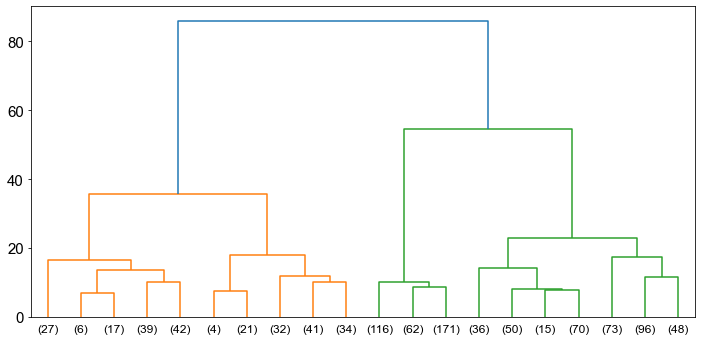

In [12]:
plt.figure(figsize=(10, 5))
_ = dendrogram(output, 20, truncate_mode='lastp')
plt.tight_layout()
plt.savefig('dendrogram.png')

In [13]:
labels = np.zeros(len(X), dtype=int)
for i, (k, v) in enumerate(clusters.items()):
    labels[v] = i

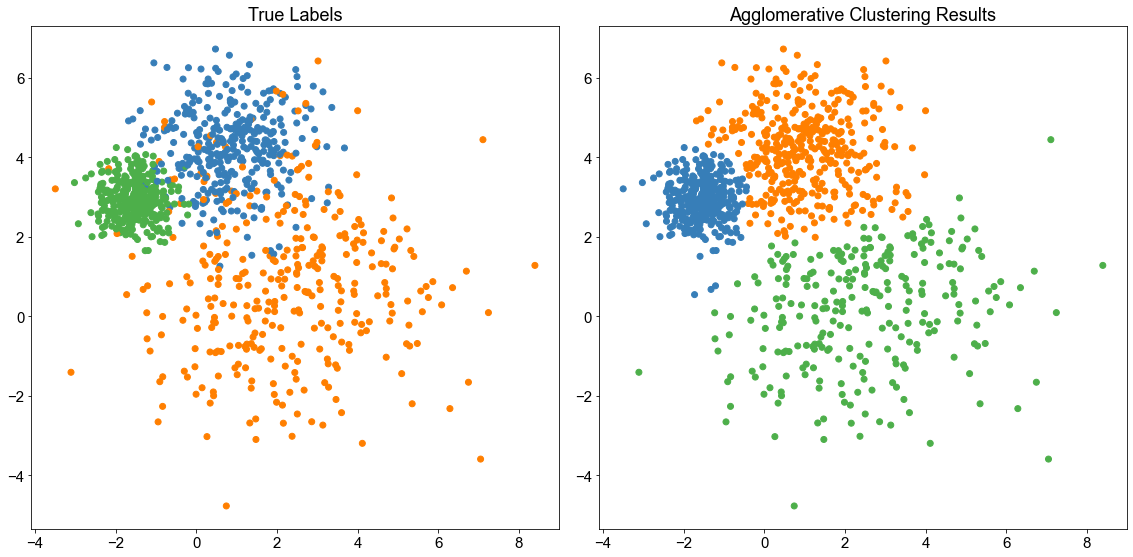

In [14]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=colors[y])
plt.title('True Labels')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=colors[labels])
plt.title('Agglomerative Clustering Results')
plt.tight_layout()
plt.savefig('agglomerative.png')